In [11]:
%pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.0 MB/s eta 0:00:00


In [7]:
%pip install scanpy

In [8]:
%pip install python-igraph

Cell 1: Load the Data

Let's start by loading our AnnData object, which already contains the PCA, neighborhood graph, and UMAP information.

In [9]:
import scanpy as sc

# Load the data with dimensionality reduction results
adata = sc.read('pbmc3k_dim_reduced.h5ad')

print("✅ Data with dimensionality reduction loaded.")
print(adata)

✅ Data with dimensionality reduction loaded.
AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


Cell 2: Perform Leiden Clustering

Now for the main event. We will run the Leiden algorithm to find communities (clusters) in our cell neighborhood graph. The results are stored directly in the .obs metadata DataFrame under the key 'leiden'.

In [12]:
# Run Leiden clustering
# The `resolution` parameter controls the granularity.
# Higher resolution -> more clusters. We'll start with the default (1.0).
sc.tl.leiden(adata)

print("✅ Leiden clustering complete.")
print("\nCluster assignments for the first 10 cells:")
print(adata.obs['leiden'].head(10))

/tmp/ipython-input-2220278022.py:4: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


✅ Leiden clustering complete.

Cluster assignments for the first 10 cells:
index
AAACATACAACCAC-1    4
AAACATTGAGCTAC-1    3
AAACATTGATCAGC-1    2
AAACCGTGCTTCCG-1    1
AAACCGTGTATGCG-1    6
AAACGCACTGGTAC-1    2
AAACGCTGACCAGT-1    4
AAACGCTGGTTCTT-1    4
AAACGCTGTAGCCA-1    4
AAACGCTGTTTCTG-1    5
Name: leiden, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


Cell 3: Visualize Clusters on UMAP

This is the most satisfying plot yet. We'll visualize our UMAP embedding again, but this time, each cell will be colored according to its cluster label. This should beautifully map onto the "islands" we saw previously.

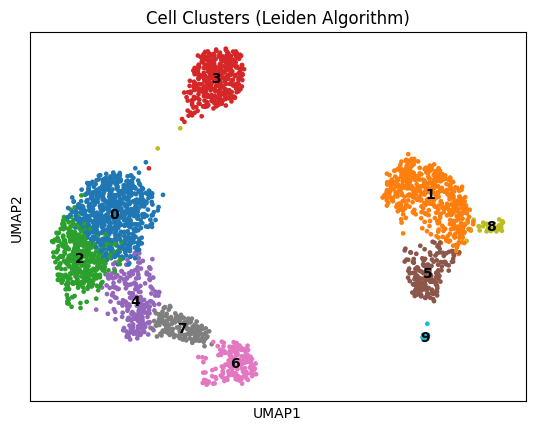

In [14]:
# Plot the UMAP colored by the Leiden cluster assignments
sc.pl.umap(adata, color='leiden', legend_loc='on data',
           title='Cell Clusters (Leiden Algorithm)')

Cell 4: Tweaking the Resolution

The number of clusters you get is dependent on the resolution parameter. Let's quickly see what happens if we use a lower resolution, which should merge some of the smaller clusters.

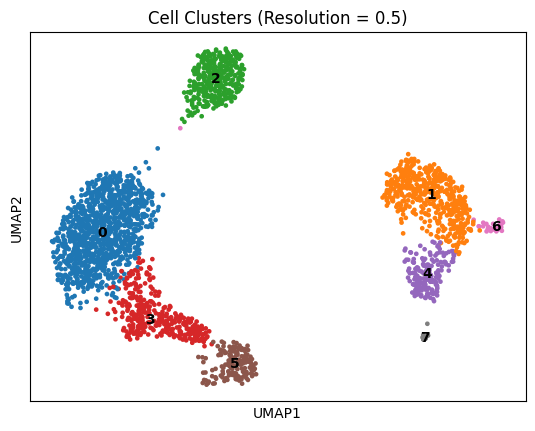

In [15]:
# Rerun clustering with a lower resolution
sc.tl.leiden(adata, resolution=0.5, key_added='leiden_res_0.5')

# Plot the UMAP with the new, lower-resolution clusters
sc.pl.umap(adata, color='leiden_res_0.5', legend_loc='on data',
           title='Cell Clusters (Resolution = 0.5)')

Cell 5: Save the Final Clustered Object

We've now reached a major milestone. We have raw data processed into meaningful clusters. Let's save this final object.

In [16]:
# Save the AnnData object with cluster information
adata.write('pbmc3k_clustered.h5ad')

print("✅ Clustered AnnData object saved.")

✅ Clustered AnnData object saved.
